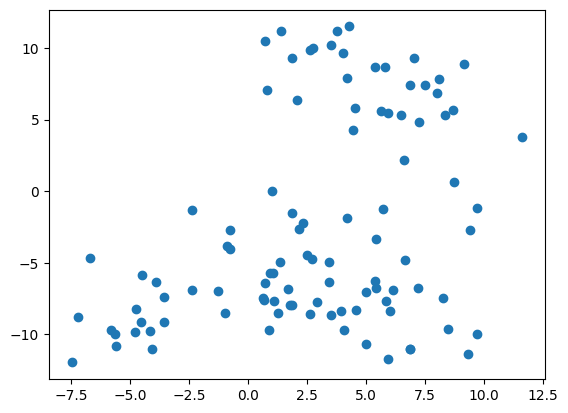

In [1]:
# Лабораторная работа № 4  Вариант 6 (blobs, random_state=68, cluster_std=2, centers=6)
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Генерация данных
X, y = make_blobs(n_samples=100, n_features=2, random_state=68, cluster_std=2, centers=6)
plt.scatter(X[:, 0], X[:, 1])


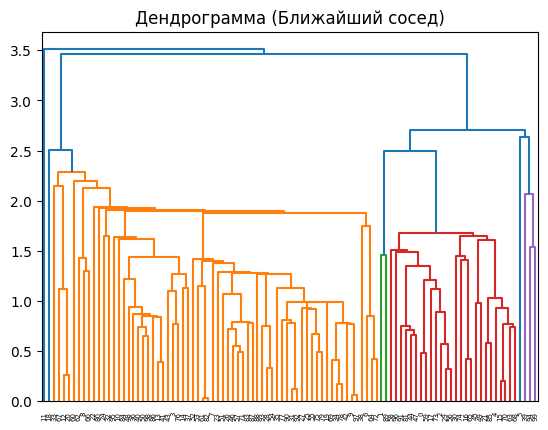

In [2]:
# Иерархическая кластеризация 
# Ближайшего соседа
mergings_single = linkage(X, method='single')
dendrogram(mergings_single)
plt.title("Дендрограмма (Ближайший сосед)")
plt.show()

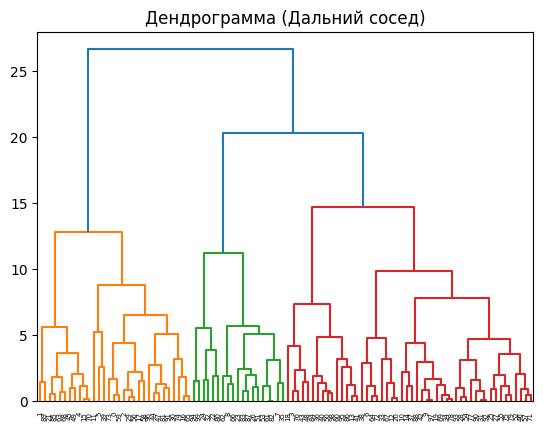

In [3]:
# Дальнего соседа
mergings_complete = linkage(X, method='complete')
dendrogram(mergings_complete)
plt.title("Дендрограмма (Дальний сосед)")
plt.show()

In [4]:
def update_cluster_centers(X, c):
    mu = np.zeros((len(np.unique(c)), X.shape[1]))
    for cluster_id in np.unique(c):
        ix = np.where(c == cluster_id)
        mu[cluster_id - 1, :] = np.mean(X[ix, :], axis=(0, 1))
    return mu

# Функция расчета среднего внутрикластерного расстояния
def calculate_avg_intra_cluster_distance(X, labels, metric='euclidean'):
    total_distance = 0
    num_clusters = len(np.unique(labels))
    for cluster_id in np.unique(labels):
        cluster_points = X[labels == cluster_id]
        if len(cluster_points) > 1:
            total_distance += np.sum(pairwise_distances(cluster_points, metric=metric))
    return total_distance / (len(X) - num_clusters)

# Функция расчета среднего межкластерного расстояния
def calculate_avg_inter_cluster_distance(X, labels, metric='euclidean'):
    cluster_centers = np.array([np.mean(X[labels == cluster_id], axis=0) for cluster_id in np.unique(labels)])
    return np.sum(pairwise_distances(cluster_centers, metric=metric))



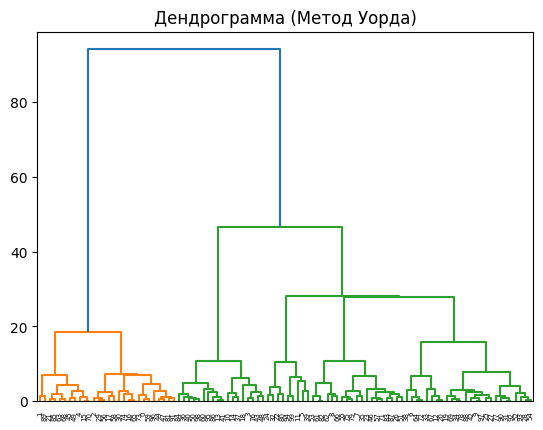

In [5]:

# Метод Уорда
mergings_ward = linkage(X, method='ward')
dendrogram(mergings_ward)
plt.title("Дендрограмма (Метод Уорда)")
plt.show()


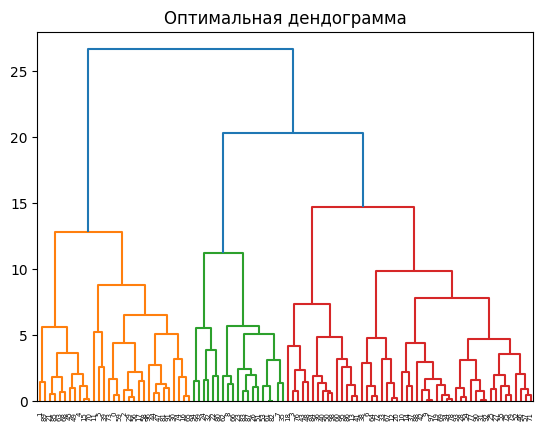

In [6]:
# Выбор оптимальной дендрограммы 
mergings_best = linkage(X, method='complete')
dendrogram(mergings_best)
plt.title("Оптимальная дендограмма")
plt.show()

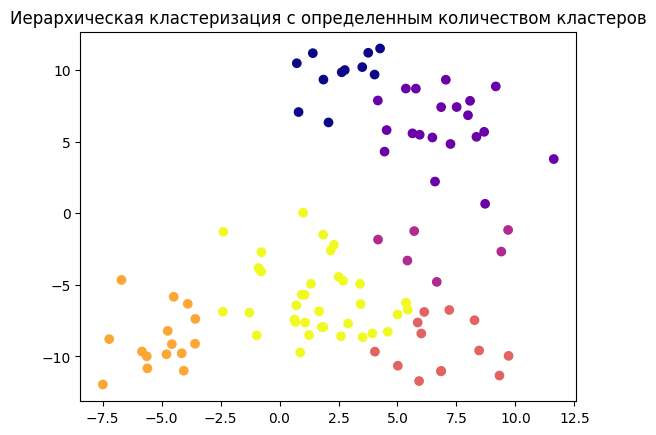

In [7]:
# Определение количества кластеров из дендрограммы
threshold = 10 
T = fcluster(mergings_complete, threshold, 'distance')

# Отображение разбиения на кластеры и центроиды
plt.scatter(X[:, 0], X[:, 1], c=T, cmap='plasma')
plt.title("Иерархическая кластеризация с определенным количеством кластеров")
plt.show()


# Расчет средних сумм расстояний для иерархической кластеризации
avg_intra_distance_hierarchy = calculate_avg_intra_cluster_distance(X, T)
avg_inter_distance_hierarchy = calculate_avg_inter_cluster_distance(X, T)



C:\Users\rewaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rewaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rewaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rewaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

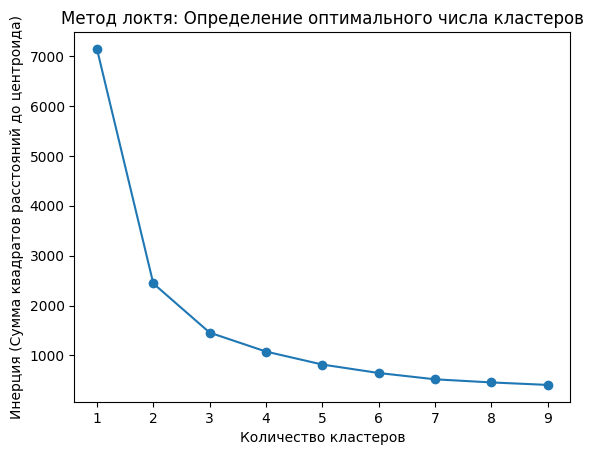

In [8]:
# Метод локтя
inertia_values = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Построение графика метода локтя
plt.plot(range(1, 10), inertia_values, marker='o')  # Оставляем 9 точек, как и у inertia_values
plt.title("Метод локтя: Определение оптимального числа кластеров")
plt.xlabel("Количество кластеров")
plt.ylabel("Инерция (Сумма квадратов расстояний до центроида)")
plt.show()